In [35]:
import pandas as pd
import json

In [36]:
f = open('no_pii_grievance_v2.json') 

data = json.load(f)
df=pd.json_normalize(data)

In [37]:
df

,_id,UserCode,dist_name,org_code,pincode,registration_no,remarks_text,sex,state,subject_content_text,v7_target,CategoryV7.$numberLong,DiaryDate.$date,closing_date.$date,recvd_date.$date,resolution_date.$date,CategoryV7,closing_date
0,MORLY/E/2023/0000001,110124,North 24 Parganas,MORLY,700130,MORLY/E/2023/0000001,"As per railway record, there is no authoriz...",M,WB,"Railways, ( Railway Board) >> Miscellaneous\r\...",No,11578,2023-01-01T00:00:19.977+0000,2023-01-04T00:00:00.000+0000,2023-01-01T00:00:19.977+0000,2023-01-04T00:00:00.000+0000,NaN,NaN
1,GOVUP/E/2023/0000001,45427,NaN,GOVUP,203001,GOVUP/E/2023/0000001,NaN,M,UP,XAXPX/X/X0X2X4X0X0\tREGARDING CBCID INSPECTION...,NaN,NaN,2023-01-01T00:01:29.780+0000,2023-01-24T00:00:00.000+0000,2023-01-01T00:01:28.567+0000,NaN,NaN,NaN
2,MOLBR/E/2023/0000001,1356254,Hyderabad,MOLBR,500023,MOLBR/E/2023/0000001,"Sir/Madam, With reference to Grievance no. XO...",M,TG,Labour and Employment >> PF Withdrawal >> Othe...,No,2369,2023-01-01T00:01:45.593+0000,2023-01-12T00:00:00.000+0000,2023-01-01T00:01:45.593+0000,2023-01-12T00:00:00.000+0000,NaN,NaN
3,MOLBR/E/2023/0000002,1092136,Nagpur,MOLBR,440001,MOLBR/E/2023/0000002,Please submit establishment clarification let...,M,MH,Labour and Employment >> Pension >> Others\r\n...,No,2379,2023-01-01T00:02:07.247+0000,2023-01-06T00:00:00.000+0000,2023-01-01T00:02:07.247+0000,2023-01-06T00:00:00.000+0000,NaN,NaN
4,GOVUP/E/2023/0000002,45427,NaN,GOVUP,203001,GOVUP/E/2023/0000002,NaN,M,UP,XAXPX/X/X0X2X4X0X8\tREGARDING CBCID INSPECTION...,NaN,NaN,2023-01-01T00:02:25.663+0000,2023-01-24T00:00:00.000+0000,2023-01-01T00:02:24.913+0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175779,UIDAI/E/2023/0001182,None,Pakaur,UIDAI,None,UIDAI/E/2023/0001182,"Dear Resident ,\r\nPlease register your compl...",M,JH,"मै एक csc e gov. का एक साधारण vle हूँ, मैंने ...",No,7753,2023-01-31T23:55:14.960+0000,2023-02-01T00:00:00.000+0000,2023-01-31T23:55:14.960+0000,2023-02-01T00:00:00.000+0000,NaN,NaN
175780,DPOST/E/2023/0004221,785742,Cuttack,DPOST,753001,DPOST/E/2023/0004221,"Sir,\r\n This Article is delivered on dated 25...",M,OR,Posts >> Delay/ Non - Delivery/Abstraction of ...,No,77,2023-01-31T23:55:47.873+0000,2023-02-03T00:00:00.000+0000,2023-01-31T23:55:47.873+0000,2023-02-03T00:00:00.000+0000,NaN,NaN
175781,MOMAF/E/2023/0000235,14256,Anantnag,MOMAF,192212,MOMAF/E/2023/0000235,This Ministry appreciate the concerns of all ...,M,JK,Minority Affairs >> Maulana Azad National Fell...,Yes,10024,2023-01-31T23:56:36.113+0000,2023-02-01T00:00:00.000+0000,2023-01-31T23:56:36.113+0000,2023-02-01T00:00:00.000+0000,NaN,NaN
175782,MOLBR/E/2023/0010864,1722766,Mumbai City,MOLBR,400049,MOLBR/E/2023/0010864,"Sir/Madam, you are hereby advised to apply fo...",F,MH,Labour and Employment >> Pension >> Transfer i...,No,2378,2023-01-31T23:59:36.513+0000,2023-02-03T00:00:00.000+0000,2023-01-31T23:59:36.513+0000,2023-02-02T00:00:00.000+0000,NaN,NaN


In [38]:
df.to_csv('no_pii_grievance_v2.csv')

In [20]:
summary_info = {}

for column in df.columns:
    num_nan = df[column].isna().sum()
    tot_num_entries = df[column].value_counts().sum()
    num_unique = df[column].nunique()
    lengths = df[column].dropna().astype(str).map(len)
    summary_info[column] = {
        'Number of NaN': num_nan,
        'Total number of valid entries':tot_num_entries,
        'Number of Unique Entries': num_unique,
        'Average Length of Entries': lengths.mean() if not lengths.empty else 0,
        'Min Length of Entries': lengths.min() if not lengths.empty else 0,
        'Max Length of Entries': lengths.max() if not lengths.empty else 0,
    }

summary_df = pd.DataFrame(summary_info).transpose()
summary_df

,Number of NaN,Total number of valid entries,Number of Unique Entries,Average Length of Entries,Min Length of Entries,Max Length of Entries
_id,0.0,175784.0,175784.0,19.967170,16.0,20.0
UserCode,77687.0,98097.0,35899.0,6.438892,2.0,7.0
dist_name,52976.0,122808.0,690.0,9.356263,3.0,39.0
org_code,383.0,175401.0,200.0,5.000000,5.0,5.0
pincode,14282.0,161502.0,13494.0,6.000000,6.0,6.0
registration_no,0.0,175784.0,175784.0,19.967170,16.0,20.0
remarks_text,68880.0,106904.0,55079.0,266.423389,1.0,2000.0
sex,0.0,175784.0,8.0,1.000000,1.0,1.0
state,263.0,175521.0,40.0,2.000000,2.0,2.0
subject_content_text,0.0,175784.0,136493.0,843.437588,1.0,7292.0


In [21]:
df =df.drop(['UserCode'],axis=1)
df =df.drop(['dist_name'],axis=1)
df =df.drop(['pincode'],axis=1)
df =df.drop(['registration_no'],axis=1)
df =df.drop(['remarks_text'],axis=1)
df =df.drop(['sex'],axis=1)
df =df.drop(['state'],axis=1)
df =df.drop(['v7_target'],axis=1)
df =df.drop(['CategoryV7.$numberLong'],axis=1)
df =df.drop(['DiaryDate.$date'],axis=1)
df =df.drop(['closing_date.$date'],axis=1)
df =df.drop(['recvd_date.$date'],axis=1)
df =df.drop(['resolution_date.$date'],axis=1)
df =df.drop(['CategoryV7'],axis=1)
df =df.drop(['closing_date'],axis=1)
df

,_id,org_code,subject_content_text
0,MORLY/E/2023/0000001,MORLY,"Railways, ( Railway Board) >> Miscellaneous\r\..."
1,GOVUP/E/2023/0000001,GOVUP,XAXPX/X/X0X2X4X0X0\tREGARDING CBCID INSPECTION...
2,MOLBR/E/2023/0000001,MOLBR,Labour and Employment >> PF Withdrawal >> Othe...
3,MOLBR/E/2023/0000002,MOLBR,Labour and Employment >> Pension >> Others\r\n...
4,GOVUP/E/2023/0000002,GOVUP,XAXPX/X/X0X2X4X0X8\tREGARDING CBCID INSPECTION...
...,...,...,...
175779,UIDAI/E/2023/0001182,UIDAI,"मै एक csc e gov. का एक साधारण vle हूँ, मैंने ..."
175780,DPOST/E/2023/0004221,DPOST,Posts >> Delay/ Non - Delivery/Abstraction of ...
175781,MOMAF/E/2023/0000235,MOMAF,Minority Affairs >> Maulana Azad National Fell...
175782,MOLBR/E/2023/0010864,MOLBR,Labour and Employment >> Pension >> Transfer i...


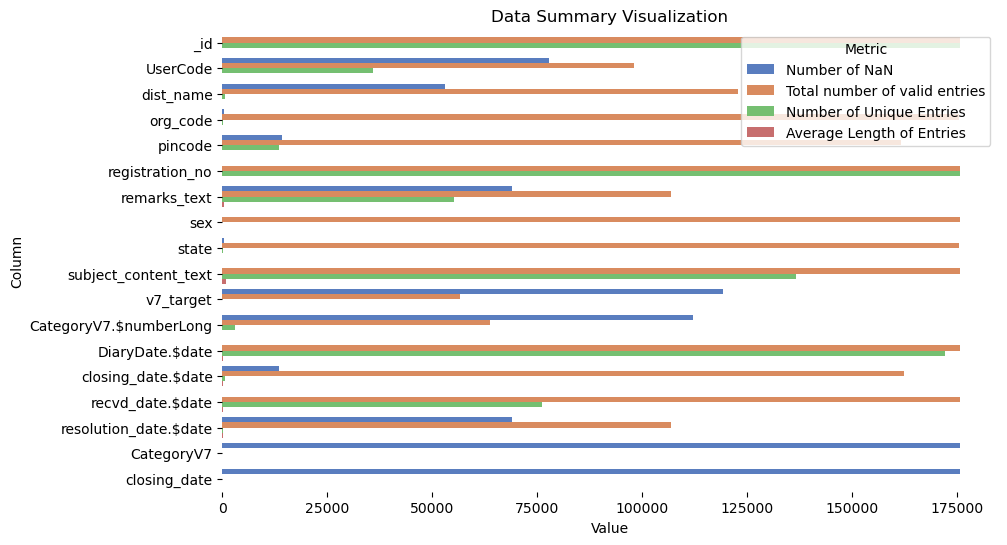

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

visualization_df = pd.DataFrame({
    'Column': summary_df.index,
    'Number of NaN': summary_df['Number of NaN'],
    'Total number of valid entries':summary_df['Total number of valid entries'],
    'Number of Unique Entries': summary_df['Number of Unique Entries'],
    'Average Length of Entries': summary_df['Average Length of Entries']
}).reset_index(drop=True)

visualization_melted_df = pd.melt(visualization_df, id_vars='Column', var_name='Metric', value_name='Value')

f, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Value", y="Column", hue="Metric", data=visualization_melted_df,
            palette="muted", ax=ax)

ax.set_xlabel('Value')
ax.set_title('Data Summary Visualization')
sns.despine(left=True, bottom=True)

plt.show()

In [23]:
df['org_code'] = df['org_code'].fillna(df['_id'].str.split('/').str[0])

In [24]:
summary_info = {}

for column in df.columns:
    num_nan = df[column].isna().sum()
    tot_num_entries = df[column].value_counts().sum()
    num_unique = df[column].nunique()
    lengths = df[column].dropna().astype(str).map(len)
    summary_info[column] = {
        'Number of NaN': num_nan,
        'Total number of valid entries':tot_num_entries,
        'Number of Unique Entries': num_unique,
        'Average Length of Entries': lengths.mean() if not lengths.empty else 0,
        'Min Length of Entries': lengths.min() if not lengths.empty else 0,
        'Max Length of Entries': lengths.max() if not lengths.empty else 0,
    }

summary_df = pd.DataFrame(summary_info).transpose()
summary_df

,Number of NaN,Total number of valid entries,Number of Unique Entries,Average Length of Entries,Min Length of Entries,Max Length of Entries
_id,0.0,175784.0,175784.0,19.967170,16.0,20.0
org_code,0.0,175784.0,200.0,5.000000,5.0,5.0
subject_content_text,0.0,175784.0,136493.0,843.437588,1.0,7292.0


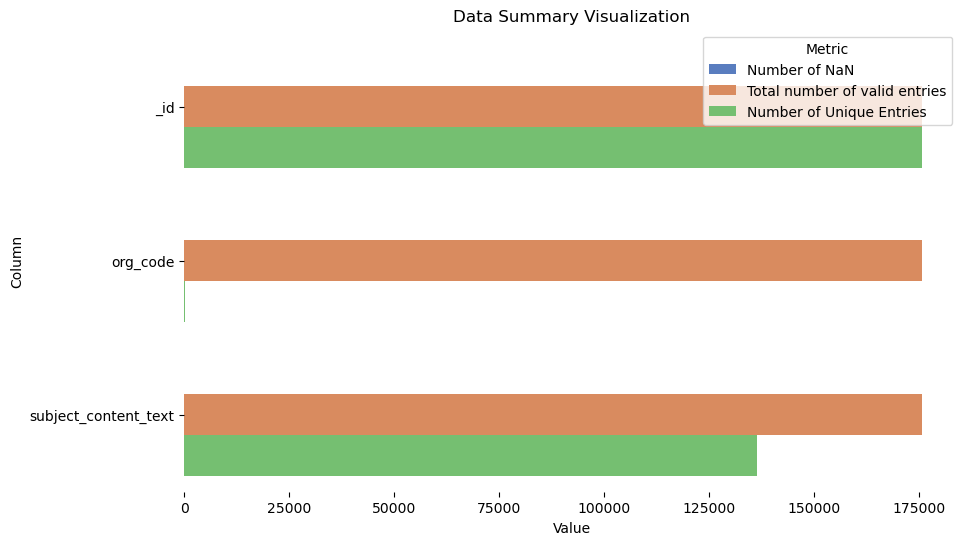

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

visualization_df = pd.DataFrame({
    'Column': summary_df.index,
    'Number of NaN': summary_df['Number of NaN'],
    'Total number of valid entries':summary_df['Total number of valid entries'],
    'Number of Unique Entries': summary_df['Number of Unique Entries'],
#     'Average Length of Entries': summary_df['Average Length of Entries']
}).reset_index(drop=True)

visualization_melted_df = pd.melt(visualization_df, id_vars='Column', var_name='Metric', value_name='Value')

f, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="Value", y="Column", hue="Metric", data=visualization_melted_df,
            palette="muted", ax=ax)

ax.set_xlabel('Value')
ax.set_title('Data Summary Visualization')
sns.despine(left=True, bottom=True)


In [26]:
for i in range(5):
    print(f"{i}th _id:\n {df['_id'][i]}\n")
    print(f"{i}th org_code:\n {df['org_code'][i]}\n")
    print(f"{i}th subject_content_text:\n {df['subject_content_text'][i]}\n")
#     print(f"{i}th remark_text:\n {df['remarks_text'][i]}")
    print('\n\n\n')

0th _id:
 MORLY/E/2023/0000001

0th org_code:
 MORLY

0th subject_content_text:
 Railways, ( Railway Board) >> Miscellaneous

Railway Board/ Zone/ PSU/ PU/ Office : Railway Board - Railway Board
-----------------------
To
The Railway Board
SDAH  ER

Location   Madhyamgram

I  further to informing you that the temporary railway line crossing near Madhyamgram station  BT end.  is in a very bad condition. The stones on the side of the line have been moved far enough to cause great danger to the yrain,common people and train passengers at any time. Please look at the matter.  Although it was said that the place will be fixed but not done!
Thanking you
Yours truly
Bhaskar  Mitra
1.1.2023





1th _id:
 GOVUP/E/2023/0000001

1th org_code:
 GOVUP

1th subject_content_text:
 XAXPX/X/X0X2X4X0X0	REGARDING CBCID INSPECTION,
closed on wrong facts, without investigate, evidence and blamed, abused to the complainant by ASP NAGAR BULANDSHAHR ANUKRITI SHARMA JI, Mr. T.P. Singh Superintending of Post H

In [27]:
df.head(50)

,_id,org_code,subject_content_text
0,MORLY/E/2023/0000001,MORLY,"Railways, ( Railway Board) >> Miscellaneous\r\..."
1,GOVUP/E/2023/0000001,GOVUP,XAXPX/X/X0X2X4X0X0\tREGARDING CBCID INSPECTION...
2,MOLBR/E/2023/0000001,MOLBR,Labour and Employment >> PF Withdrawal >> Othe...
3,MOLBR/E/2023/0000002,MOLBR,Labour and Employment >> Pension >> Others\r\n...
4,GOVUP/E/2023/0000002,GOVUP,XAXPX/X/X0X2X4X0X8\tREGARDING CBCID INSPECTION...
5,GOVUP/E/2023/0000003,GOVUP,XAXPX/X/X0X2X4X0X7\tREGARDING CBCID INSPECTION...
6,MODEF/E/2023/0000001,MODEF,Defence >> Canteen Stores Depot related >> Non...
7,DEPOJ/E/2023/0000002,DEPOJ,Justice >> Others\r\n-----------------------\r...
8,MEAPD/E/2023/0000001,MEAPD,External Affairs >> Others\r\n----------------...
9,DORLD/E/2023/0000001,DORLD,Rural Development >> Pradhan Mantri Gram Sadak...


In [28]:
df =df.drop(['_id'],axis=1)

In [29]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

import re
import preprocessor as p

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [30]:
df

,org_code,subject_content_text
0,MORLY,"Railways, ( Railway Board) >> Miscellaneous\r\..."
1,GOVUP,XAXPX/X/X0X2X4X0X0\tREGARDING CBCID INSPECTION...
2,MOLBR,Labour and Employment >> PF Withdrawal >> Othe...
3,MOLBR,Labour and Employment >> Pension >> Others\r\n...
4,GOVUP,XAXPX/X/X0X2X4X0X8\tREGARDING CBCID INSPECTION...
...,...,...
175779,UIDAI,"मै एक csc e gov. का एक साधारण vle हूँ, मैंने ..."
175780,DPOST,Posts >> Delay/ Non - Delivery/Abstraction of ...
175781,MOMAF,Minority Affairs >> Maulana Azad National Fell...
175782,MOLBR,Labour and Employment >> Pension >> Transfer i...


In [ ]:
def clean_content_text(df):
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    tempArr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [ ]:
df['content_text'] = clean_content_text(df['subject_content_text'])
df.head()

In [ ]:
!pip install -U preprocessor
!pip install tweet-preprocessor

In [32]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

pattern = r'[A-Za-z\d]+(\/[A-Za-z\d]*)*'

def contains_anonymized_pattern(text):
#     DO SOME Processing to remove crazy annoymizedtext to remove uncessary info

def preprocess_text(text):
    text = contains_anonymized_pattern(text) 
    
    text = text.lower()
    
    text = re.sub(r'\W|\d', ' ', text)
    
    tokens = word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/devanshwassista/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devanshwassista/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/devanshwassista/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
%%time
df['processed_subject_content_text'] = df['subject_content_text'].apply(preprocess_text)
 
print(df['processed_subject_content_text'])

0                                                          
1                                                          
2                                                          
3                                                          
4                                                          
                                ...                        
175779    म एक क एक स ध रण ह म न आध र सर व स क ल ए क व ब...
175780                                                     
175781                                                     
175782                                                     
175783    श क यत सन दर भ स ख य क म मल म अब तक प ड़ त क क ...
Name: processed_subject_content_text, Length: 175784, dtype: object
CPU times: user 54.7 s, sys: 936 ms, total: 55.7 s
Wall time: 1min


In [34]:
for i in range(5):
    print(f"{i}th _id:\n {df['processed_subject_content_text'][i]}\n")

0th _id:
 

1th _id:
 

2th _id:
 

3th _id:
 

4th _id:
 

